<p style='text-align:center'>
PSY 394U <b>Methods for fMRI</b>, Fall 2018


<img style='width: 300px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2018/blob/master/Images/Placebo_Left.png?raw=true' alt='brain blobs'/>

</p>

<p style='text-align:center; font-size:40px; margin-bottom: 30px;'><b> First-level analysis </b></p>

<p style='text-align:center; font-size:18px; margin-bottom: 32px;'><b> November 19, 2018</b></p>

<hr style='height:5px;border:none' />

# First-level analysis - theoretical background
<hr style="height:1px;border:none" />

The first-level analysis refers to a statistical analysis of fMRI data on a single subject (of a single session and/or a single run). The main goal in the first-level analysis is to fit a temporal model to the fMRI data to quantify the activation of interest as contrast(s). 

## Predicted BOLD signals
Say, your fMRI experiement consists of epochs of baseline and stimulus.

<img style='width: 400px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2018/blob/master/Images/Level1_ExperimentDesign.png?raw=true' alt='Experiment design'/>

In this experiment, you anticipate activations associated with the stimulus, and you try to capture that with BOLD (blood oxygenation-level dependent) fMRI. However, after a neural activity, you can only observe delayed response in the resultant BOLD signal due to a hemodynamic delay. Such a delay is modeled by a function known as a **hemodynamic response function (HRF)**. The predicted BOLD signal, from an fMRI experiment, is the underlying neural activity convolved by an HRF.

<img style='width: 700px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2018/blob/master/Images/Level1_BOLDSignal.png?raw=true' alt='Predicted BOLD signal'/>

In most fMRI analysis software tools, you can generate boxcar signals for predicted neural activities simply by providing event onset times and durations. There are also a number of HRF models available for you to choose from. Your predicted neural response is convolved by the HRF of your choice, so you don't have to generate predicted BOLD fMRI signals by yourself.

## High-pass filtering

During an fMRI experiment, BOLD fMRI signals often fluctuates slowly, the phenomenon known as the **low-frequency drift**. 

<img style='width: 400px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2018/blob/master/Images/Level1_LowFreqDrift.png?raw=true' alt='Low frequency drift'/>

This poses a challenge in statistical analyses of the data. Luckily low-frequency drift can be easily removed from fMRI data. Since it is low frequency, a high-pass filter can eliminate it. 

<img style='width: 500px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2018/blob/master/Images/Level1_HighPass.png?raw=true' alt='High-pass filter before and after'/>

A cut-off frequency of around 0.01Hz (or a period of 100s) seems to work well for typical fMRI data. 


## GLM

GLM stands for **general linear model**. It is a statistical model that can be used for different types of analyses:
  * ANOVA (analysis of variance): Comparison of group means
  * ANCOVA (analysis of covariance): ANOVA adjusted for continuous variables
  * Linear regression, simple & multiple
  * T-test: Statistical test on mean(s)
  * F-test: Statistical test to compare variances
  
<img style='width: 500px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2018/blob/master/Images/Level1_GLMSimple.png?raw=true' alt='GLM for simple regression'/>

For your fMRI experiment data, you can fit such a model at each voxel separately.

<img style='width: 400px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2018/blob/master/Images/Level1_GLMSimple_fMRI.png?raw=true' alt='GLM for simple regression, fMRI'/>

In this case, $\beta$ parameters from all voxels collectively form a 3D image.

In a more realistic case, there are more than one regressors in a GLM. 

<img style='width: 500px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2018/blob/master/Images/Level1_GLMMultiple.png?raw=true' alt='GLM for multiple regression'/>

Or, using a matrix notation, one can describe this model with vectors:

<img style='width: 500px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2018/blob/master/Images/Level1_GLMMultipleMatrix.png?raw=true' alt='GLM for multiple regression, matrix notation'/>

In an fMRI experiment, a GLM with multiple regressors will result in multiple beta images.

<img style='width: 500px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2018/blob/master/Images/Level1_GLMMultiple_fMRI.png?raw=true' alt='GLM for multiple regression, fMRI experiment'/>

### Notes on GLM for fMRI
***fMRI time series is temporally correlated***
   * Not independent data points. Violation in the assumptions of an ordinary regression model
   
***The temporal correlation needs to be addressed somehow***
   * **Pre-whitenening**: Temporal correlation is minimized so that data points are almost independent. 
   * **Explicitly modeling temporal correlation**: The temporal correlation between neighboring time points is estimated, and used in the statistical model. 

***HRF is different in different parts of the brain***
   * **Temporal derivatives** of the predicted BOLD signal can be included also included as regressors in the GLM
   * Inclusion of temporal derivatives can correct delays in BOLD signals

***Second line of difference against subject motion***
   * The **rigid-body transformation parameters** from the motion correction step can be included as regressors in the GLM
   * Any motion-associated fluctuation in BOLD fMRI can be corrected.

   
## Contrasts

A contrast is a linear combination of regression parameters $\beta$s. For example,

  * $\beta_1$: Activation associated with condition 1
  * $-\beta_2$: Deactivation associated with condition 2
  * $\beta_2-\beta_1$: Activation difference between conditions 2 and 1. (Condition 2 > Condition 1)
  * $\beta_3-\beta_1$: Activation difference between conditions 3 and 1. (Condition 3 > Condition 1)

Or, using a vector notation, we can describe these contrasts as

$$
    \beta_1 = \begin{bmatrix}1 & 0 & 0 \end{bmatrix}
        \begin{bmatrix}
           \beta_{1} \\
           \beta_{2} \\
           \beta_{3}
         \end{bmatrix}
$$

$$
    -\beta_2 = \begin{bmatrix}0 & -1 & 0 \end{bmatrix}
        \begin{bmatrix}
           \beta_{1} \\
           \beta_{2} \\
           \beta_{3}
         \end{bmatrix}
$$

$$
    \beta_2-\beta_1 = \begin{bmatrix}-1 & 1 & 0 \end{bmatrix}
        \begin{bmatrix}
           \beta_{1} \\
           \beta_{2} \\
           \beta_{3}
         \end{bmatrix}
$$

$$
    \beta_1+\beta_2+\beta_3 = \begin{bmatrix}1 & 1 & 1 \end{bmatrix}
        \begin{bmatrix}
           \beta_{1} \\
           \beta_{2} \\
           \beta_{3}
         \end{bmatrix}
$$

In a first-level analysis, a contrast image can be calculated from beta-images. For example, then contrast $\beta_2 - \beta_1$ can be calculated as:

<img style='width: 500px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2018/blob/master/Images/Level1_ContrastImage.png?raw=true' alt='Contrast image example'/>

Once the contrast image is generated, it is possible to perform a T-test (at each voxel separately) by calculating a T-statistic image. A T-statistic image can be calculated by dividing a contrast image by the residual standard error (SE) image, with an appropriate normalizing constant.

<img style='width: 500px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2018/blob/master/Images/Level1_TStatImage.png?raw=true' alt='T-statistic image calculation'/>

In fMRI data analysis, the directionality matters. Highly positive T-statistics are associated with activations or effects described in the contrast. Highly negative T-statistics, on the other hand, represent deactivations or  negative effects.

### Omnibus testing with an F-contrast

Say, you are interested in the difference among any of 3 conditions. In other words, you want to examine:
  * $\beta_3 - \beta_2$ (contrast vector [0 -1 1])
  * $\beta_3 - \beta_1$ (contrast vector [-1 0 1])
  * $\beta_2 - \beta_1$ (contrast vector [-1 1 0])

You can examine each of these separately by a t-test. Or, you can examine these together collectively using an **F-contrast**. An F-contrast can be written as a matrix. In this particular example, the contrast is described by stacking the contrasts into a matrix.

$$
        \begin{bmatrix}
           0 & -1 & 1 \\
           -1 & 0 & 1 \\
           -1 & 1 & 0 
         \end{bmatrix}
$$

If you are interested in an F-contrast, an F-contrast image as well as an F-statistic image can be calculated (details not shown). An F-statistic is non-directional. Thus a significantly large F-statistic may mean either activation or deactivation (or positive or negative differences), but the directionality cannot be determined by an F-statistic alone. Moreover, it is hard to determine which comparison contributed to the significant F-test outcome.

# First-level analysis - FSL approach
<hr style="height:1px;border:none" />

`<Level1_fsl.py>`

In [1]:
%matplotlib inline

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import nibabel as nib   # nibabel to read TR from image header
import nipype.interfaces.fsl as fsl # importing FSL interface functions
from nipype import Node, Workflow  # components to construct workflow
from nipype.interfaces.io import DataSink  # datasink
from nipype.algorithms import modelgen  # GLM model generator
from nipype.interfaces.base import Bunch
from bids.grabbids import BIDSLayout  # BIDSLayout object to specify file(s)


# data directory
dataDir = '/Users/sh45474/Documents/Teaching/fMRI_Fall_2018/Data/ds114'

# base directory - where preprocessed fMRI data is located
baseDir = os.path.join(dataDir, 'WorkflowOutput/FSL_Preproc_fMRI')

# Creating the layout object for this BIDS data set
layout = BIDSLayout(dataDir)

# pre-processed fMRI data
imagefMRI = os.path.join(baseDir,
                         'sub-09_ses-test_task-fingerfootlips_bold_roi_mcf_warp_smooth_masked.nii.gz')

# task information file
eventFile = layout.get(type='events',
                       task='fingerfootlips',
                       extensions='tsv',
                       return_type='file')[0]


# Output directory
outDir = os.path.join(dataDir,'WorkflowOutput')

# getting TR from the image header
fMRI = nib.load(imagefMRI)   # image object
hdr_fMRI = fMRI.header
TR = hdr_fMRI['pixdim'][4]

Failed to import duecredit due to No module named 'duecredit'
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/bids/grabbids/__init__.py:6: FutureWarning: grabbids has been renamed to layout in version 0.6.5, and will be removed in version 0.8
  warnings.warn("grabbids has been renamed to layout in version 0.6.5, and will be removed in version 0.8", FutureWarning)


In [3]:
## Getting experiment info from the event file, into a Bunch object
trialInfo = pd.read_table(eventFile)

In [4]:
trialInfo

,onset,duration,weight,trial_type
0,10,15.0,1,Finger
1,40,15.0,1,Foot
2,70,15.0,1,Lips
3,100,15.0,1,Finger
4,130,15.0,1,Foot
5,160,15.0,1,Lips
6,190,15.0,1,Finger
7,220,15.0,1,Foot
8,250,15.0,1,Lips
9,280,15.0,1,Finger


In [5]:
# creating a list of conditions
conditions = sorted(list(set(trialInfo.trial_type)))

In [6]:
conditions

['Finger', 'Foot', 'Lips']

In [7]:
# extracting onset and duration information
onsets = []
durations = []

for itrial in conditions:
    onsets.append(list(trialInfo[trialInfo.trial_type==itrial].onset-10)) # subtracting 10s due to removing of 4 dummy scans
    durations.append(list(trialInfo[trialInfo.trial_type==itrial].duration))

In [8]:
onsets

[[0, 90, 180, 270, 360], [30, 120, 210, 300, 390], [60, 150, 240, 330, 420]]

In [9]:
durations

[[15.0, 15.0, 15.0, 15.0, 15.0],
 [15.0, 15.0, 15.0, 15.0, 15.0],
 [15.0, 15.0, 15.0, 15.0, 15.0]]

In [11]:
# consolidation these lists into a single Bunch object
subject_info = [Bunch(conditions=conditions,
                      onsets=onsets,
                      durations=durations,
                      )]

In [12]:
subject_info

[Bunch(conditions=['Finger', 'Foot', 'Lips'],
       durations=[[15.0, 15.0, 15.0, 15.0, 15.0],
        [15.0, 15.0, 15.0, 15.0, 15.0],
        [15.0, 15.0, 15.0, 15.0, 15.0]],
       onsets=[[0, 90, 180, 270, 360],
        [30, 120, 210, 300, 390],
        [60, 150, 240, 330, 420]])]

In [13]:
## Defining contrasts
cont01 = ['average',        'T', conditions, [1/3., 1/3., 1/3.]]
cont02 = ['Finger',         'T', conditions, [1, 0, 0]]
cont03 = ['Foot',           'T', conditions, [0, 1, 0]]
cont04 = ['Lips',           'T', conditions, [0, 0, 1]]
cont05 = ['Finger > others','T', conditions, [1, -0.5, -0.5]]
cont06 = ['Foot > others',  'T', conditions, [-0.5, 1, -0.5]]
cont07 = ['Lips > others',  'T', conditions, [-0.5, -0.5, 1]]

cont08 = ['activation',     'F', [cont02, cont03, cont04]]

contrast_list = [cont01, cont02, cont03, cont04, cont05, cont06, cont07, cont08]

In [14]:
contrast_list

[['average',
  'T',
  ['Finger', 'Foot', 'Lips'],
  [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]],
 ['Finger', 'T', ['Finger', 'Foot', 'Lips'], [1, 0, 0]],
 ['Foot', 'T', ['Finger', 'Foot', 'Lips'], [0, 1, 0]],
 ['Lips', 'T', ['Finger', 'Foot', 'Lips'], [0, 0, 1]],
 ['Finger > others', 'T', ['Finger', 'Foot', 'Lips'], [1, -0.5, -0.5]],
 ['Foot > others', 'T', ['Finger', 'Foot', 'Lips'], [-0.5, 1, -0.5]],
 ['Lips > others', 'T', ['Finger', 'Foot', 'Lips'], [-0.5, -0.5, 1]],
 ['activation',
  'F',
  [['Finger', 'T', ['Finger', 'Foot', 'Lips'], [1, 0, 0]],
   ['Foot', 'T', ['Finger', 'Foot', 'Lips'], [0, 1, 0]],
   ['Lips', 'T', ['Finger', 'Foot', 'Lips'], [0, 0, 1]]]]]

In [15]:
# model specification
modelspec = Node(modelgen.SpecifyModel(functional_runs=imagefMRI,
                                       subject_info=subject_info,
                                       input_units='secs',
                                       time_repetition=TR,
                                       high_pass_filter_cutoff=100),
                 name="modelspec")

# first-level design
level1design = Node(fsl.Level1Design(bases={'dgamma':{'derivs': True}},
                                     interscan_interval=TR,
                                     model_serial_correlations=True,
                                     contrasts=contrast_list),
                    name="level1design")

# creating all the other files necessary to run the model
modelgen = Node(fsl.FEATModel(),
                name='modelgen')

# then running through FEAT
feat = Node(fsl.FEAT(),
            name="feat")

In [16]:
# creating datasink to collect outputs
datasink = Node(DataSink(base_directory=outDir), 
                name='datasink')

In [17]:
# creating the workflow
firstLevel = Workflow(name="Level1_FSL", base_dir=outDir)

# connecting nodes
firstLevel.connect([(modelspec, level1design, [('session_info', 'session_info')])])
firstLevel.connect([(level1design, modelgen, [('fsf_files', 'fsf_file'),
                                              ('ev_files','ev_files')])])
firstLevel.connect([(level1design, feat, [('fsf_files', 'fsf_file')])])
firstLevel.connect([(feat, datasink, [('feat_dir', 'FSL_Level1.@feat')])])

181119-14:28:23,154 nipype.workflow INFO:
	 Generated workflow graph: /Users/sh45474/Documents/Teaching/fMRI_Fall_2018/Data/ds114/WorkflowOutput/Level1_FSL/graph_orig.png (graph2use=orig, simple_form=True).


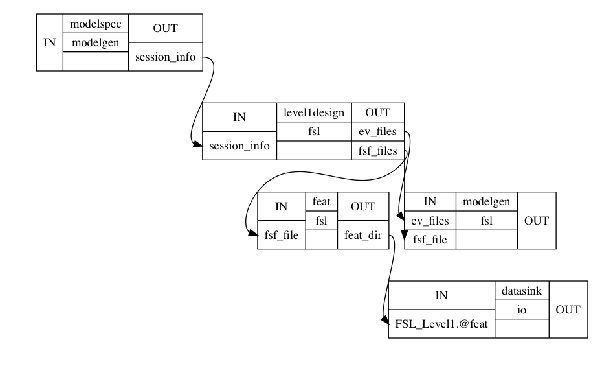

In [18]:
# writing out graph
firstLevel.write_graph(graph2use='orig', dotfilename='graph_orig.dot')

# showing the graph
plt.figure(figsize=[10,10])
img=mpimg.imread(os.path.join(outDir,"Level1_FSL","graph_orig_detailed.png"))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [19]:
# running the workflow
firstLevel.run()

181119-14:28:53,909 nipype.workflow INFO:
	 Workflow Level1_FSL settings: ['check', 'execution', 'logging', 'monitoring']
181119-14:28:53,919 nipype.workflow INFO:
	 Running serially.
181119-14:28:53,920 nipype.workflow INFO:
	 [Node] Setting-up "Level1_FSL.modelspec" in "/Users/sh45474/Documents/Teaching/fMRI_Fall_2018/Data/ds114/WorkflowOutput/Level1_FSL/modelspec".
181119-14:28:53,924 nipype.workflow INFO:
	 [Node] Cached "Level1_FSL.modelspec" - collecting precomputed outputs
181119-14:28:53,926 nipype.workflow INFO:
	 [Node] "Level1_FSL.modelspec" found cached.
181119-14:28:53,927 nipype.workflow INFO:
	 [Node] Setting-up "Level1_FSL.level1design" in "/Users/sh45474/Documents/Teaching/fMRI_Fall_2018/Data/ds114/WorkflowOutput/Level1_FSL/level1design".
181119-14:28:53,934 nipype.workflow INFO:
	 [Node] Outdated cache found for "Level1_FSL.level1design".
181119-14:28:53,942 nipype.workflow INFO:
	 [Node] Running "level1design" ("nipype.interfaces.fsl.model.Level1Design")
181119-14:28

# First-level analysis - SPM approach
<hr style="height:1px;border:none" />

`<Level1_spm.py>`

In [20]:
%matplotlib inline

In [22]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import nibabel as nib   # nibabel to read TR from image header
import nipype.interfaces.spm as spm # importing SPM interface functions
from nipype import Node, Workflow  # components to construct workflow
from nipype.interfaces.io import DataSink  # datasink
from nipype.algorithms import modelgen  # GLM model generator
from nipype.interfaces.base import Bunch
from bids.grabbids import BIDSLayout  # BIDSLayout object to specify file(s)


# data directory
dataDir = '/Users/sh45474/Documents/Teaching/fMRI_Fall_2018/Data/ds114'

# base directory - where preprocessed fMRI data is located
baseDir = os.path.join(dataDir, 'WorkflowOutput/SPM_Preproc_fMRI')

# Creating the layout object for this BIDS data set
layout = BIDSLayout(dataDir)

# pre-processed fMRI data
imagefMRI = os.path.join(baseDir,
                         'swrsub-09_ses-test_task-fingerfootlips_bold.nii')

# task information file
eventFile = layout.get(type='events',
                       task='fingerfootlips',
                       extensions='tsv',
                       return_type='file')[0]

# brain mask image
#imageMask = '/usr/local/spm12/tpm/TPM.nii'
imageMask = '/Users/sh45474/SoftwareTools/spm12/tpm/mask_ICV.nii'

# Output directory
outDir = os.path.join(dataDir,'WorkflowOutput')

# TR for the fMRI time series
TR = 2.5

In [21]:
## Getting experiment info from the event file, into a Bunch object
trialInfo = pd.read_table(eventFile)
conditions = sorted(list(set(trialInfo.trial_type)))
onsets = []
durations = []

for itrial in conditions:
    onsets.append(list(trialInfo[trialInfo.trial_type==itrial].onset)) 
    durations.append(list(trialInfo[trialInfo.trial_type==itrial].duration))

subject_info = [Bunch(conditions=conditions,
                      onsets=onsets,
                      durations=durations,
                      )]

In [23]:
subject_info

[Bunch(conditions=['Finger', 'Foot', 'Lips'],
       durations=[[15.0, 15.0, 15.0, 15.0, 15.0],
        [15.0, 15.0, 15.0, 15.0, 15.0],
        [15.0, 15.0, 15.0, 15.0, 15.0]],
       onsets=[[10, 100, 190, 280, 370],
        [40, 130, 220, 310, 400],
        [70, 160, 250, 340, 430]])]

In [24]:
## Defining contrasts
cont01 = ['average',        'T', conditions, [1/3., 1/3., 1/3.]]
cont02 = ['Finger',         'T', conditions, [1, 0, 0]]
cont03 = ['Foot',           'T', conditions, [0, 1, 0]]
cont04 = ['Lips',           'T', conditions, [0, 0, 1]]
cont05 = ['Finger > others','T', conditions, [1, -0.5, -0.5]]
cont06 = ['Foot > others',  'T', conditions, [-0.5, 1, -0.5]]
cont07 = ['Lips > others',  'T', conditions, [-0.5, -0.5, 1]]

cont08 = ['activation',     'F', [cont02, cont03, cont04]]

contrast_list = [cont01, cont02, cont03, cont04, cont05, cont06, cont07, cont08]

In [25]:
# specifying the model
modelspec = Node(modelgen.SpecifySPMModel(functional_runs=imagefMRI,
                                          input_units='secs',
                                          output_units='secs',
                                          time_repetition=TR,
                                          high_pass_filter_cutoff=100,
                                          subject_info=subject_info),
                 name="modelspec")

# First-level model
level1design = Node(spm.Level1Design(bases={'hrf': {'derivs': [1, 0]}},
                                     timing_units='secs',
                                     interscan_interval=TR,
                                     model_serial_correlations='AR(1)',
                                     mask_image=imageMask),
                    name="level1design")

# EstimateModel - estimate the parameters of the model
level1estimate = Node(spm.EstimateModel(estimation_method={'Classical': 1}),
                      name="level1estimate")

# EstimateContrast - estimates contrasts
level1conest = Node(spm.EstimateContrast(contrasts=contrast_list),
                    name="level1conest")

In [26]:
# creating datasink to collect outputs
datasink = Node(DataSink(base_directory=outDir), 
                name='datasink')

In [27]:
# Initiation of the 1st-level analysis workflow
l1analysis = Workflow(name='Level1_SPM', base_dir=outDir)


# Connect up the 1st-level analysis components
l1analysis.connect([(modelspec, level1design, [('session_info','session_info')]),
                    (level1design, level1estimate, [('spm_mat_file','spm_mat_file')]),
                    (level1estimate, level1conest, [('spm_mat_file','spm_mat_file'),
                                                    ('beta_images','beta_images'),
                                                    ('residual_image','residual_image')]),
                    (level1conest, datasink, [('spm_mat_file', 'SPM_Level1.@spm_mat'),
                                              ('spmT_images', 'SPM_Level1.@T'),
                                              ('con_images', 'SPM_Level1.@con'),
                                              ('spmF_images', 'SPM_Level1.@F'),
                                              ('ess_images', 'SPM_Level1.@ess'),
                                              ]),
                    ])

181119-14:59:14,55 nipype.workflow INFO:
	 Generated workflow graph: /Users/sh45474/Documents/Teaching/fMRI_Fall_2018/Data/ds114/WorkflowOutput/Level1_SPM/graph_orig.png (graph2use=orig, simple_form=True).


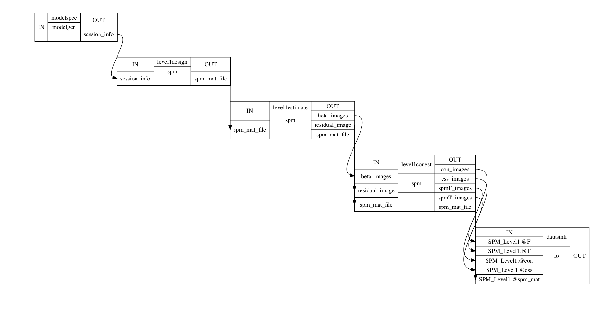

In [28]:
# writing out graph
l1analysis.write_graph(graph2use='orig', dotfilename='graph_orig.dot')

# showing the graph
plt.figure(figsize=[10,10])
img=mpimg.imread(os.path.join(outDir,"Level1_SPM","graph_orig_detailed.png"))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [29]:
# running the workflow
l1analysis.run()

181119-14:59:54,74 nipype.workflow INFO:
	 Workflow Level1_SPM settings: ['check', 'execution', 'logging', 'monitoring']
181119-14:59:54,87 nipype.workflow INFO:
	 Running serially.
181119-14:59:54,89 nipype.workflow INFO:
	 [Node] Setting-up "Level1_SPM.modelspec" in "/Users/sh45474/Documents/Teaching/fMRI_Fall_2018/Data/ds114/WorkflowOutput/Level1_SPM/modelspec".
181119-14:59:54,93 nipype.workflow INFO:
	 [Node] Cached "Level1_SPM.modelspec" - collecting precomputed outputs
181119-14:59:54,93 nipype.workflow INFO:
	 [Node] "Level1_SPM.modelspec" found cached.
181119-14:59:54,94 nipype.workflow INFO:
	 [Node] Setting-up "Level1_SPM.level1design" in "/Users/sh45474/Documents/Teaching/fMRI_Fall_2018/Data/ds114/WorkflowOutput/Level1_SPM/level1design".
181119-14:59:54,100 nipype.workflow INFO:
	 [Node] Outdated cache found for "Level1_SPM.level1design".
181119-14:59:54,107 nipype.workflow INFO:
	 [Node] Running "level1design" ("nipype.interfaces.spm.model.Level1Design")
181119-15:00:17,61

RuntimeError: Workflow did not execute cleanly. Check log for details

### Exercise
**First-level workflow, `ds102`**. Write a program with a workflow for the first-level analysis for the `ds102` you processed for your Homework Assignment 4. You may choose either `run1` or `run2`. Post the code on Canvas.